# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [18]:
! git clone https://www.github.com/DS3001/the_bootstrap

fatal: destination path 'the_bootstrap' already exists and is not an empty directory.


**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.


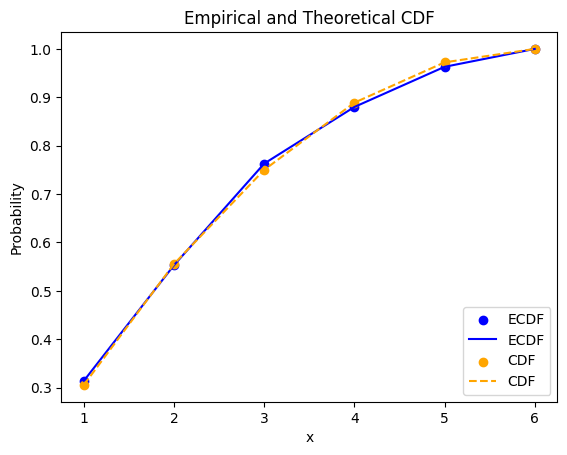

In [9]:
dice = np.array([1, 2, 3, 4, 5, 6])

pdf = np.zeros(len(dice))
for i in dice:
    for j in dice:
        Rmin = min(i, j)
        pdf[Rmin - 1] += 1
pdf /= len(dice) ** 2
cdf_theoretical = np.cumsum(pdf)

N = 1000
d1 = np.random.choice(dice, size=N)
d2 = np.random.choice(dice, size=N)
min_roll = np.minimum(d1, d2)

ecdf = np.array([np.mean(min_roll <= face) for face in dice])

# Plot the results
plt.scatter(dice, ecdf, label='ECDF', color='blue')
plt.plot(dice, ecdf, label='ECDF', linestyle='-', color='blue')
plt.scatter(dice, cdf_theoretical, label='CDF', color='orange')
plt.plot(dice, cdf_theoretical, label='CDF', linestyle='--', color='orange')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()

2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.

Expected value: 3.50172


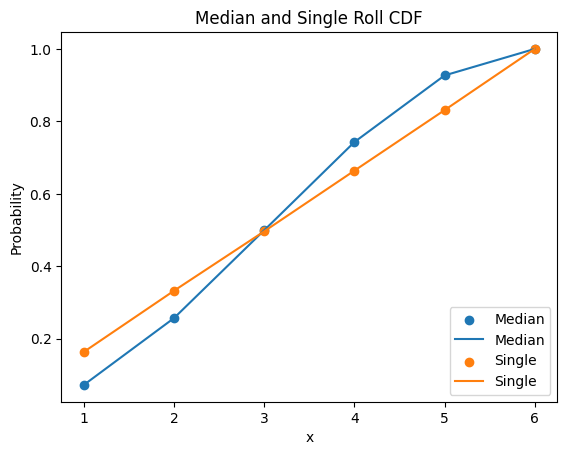

In [10]:

dice = np.array([1, 2, 3, 4, 5, 6])
N = 50000
d1 = np.random.choice(dice, size=N)
d2 = np.random.choice(dice, size=N)
d3 = np.random.choice(dice, size=N)
med_roll = np.median(np.stack([d1, d2, d3]), axis=0).astype(int)

expected_value = np.mean(med_roll)
print('Expected value:', expected_value)

ecdf = np.array([np.mean(med_roll <= face) for face in dice])
single = np.array([np.mean(d1 <= face) for face in dice])

plt.scatter(dice, ecdf, label='Median')
plt.plot(dice, ecdf, label='Median')
plt.scatter(dice, single, label='Single')
plt.plot(dice, single, label='Single')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Median and Single Roll CDF')
plt.show()

3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

                 0
count  50000.00000
mean       4.18424
std        3.23338
min        1.00000
25%        2.00000
50%        4.00000
75%        5.00000
max       43.00000


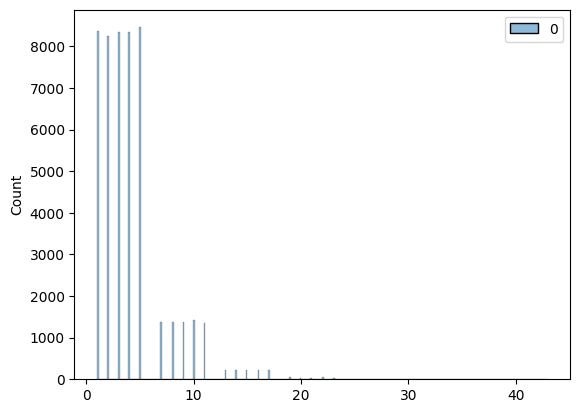

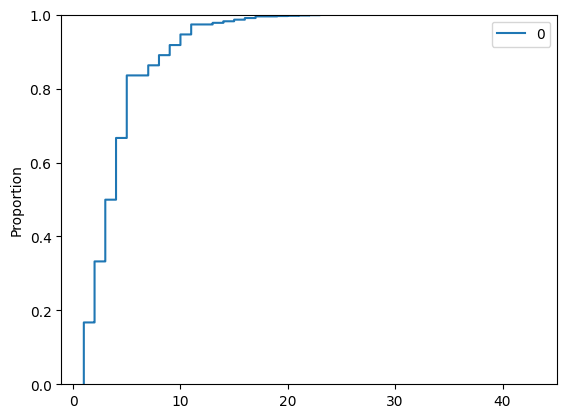

In [16]:
N = 50000
dice = np.array([1, 2, 3, 4, 5, 6])
results = []

for _ in range(N):
    total = 0
    while True:
        roll = np.random.choice(dice)
        total += roll
        if roll < 6:
            results.append(total)
            break

results = pd.DataFrame(results)

print(results.describe())

sns.histplot(results)
plt.show()

sns.ecdfplot(results)
plt.show()

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./data/mammogram.csv')

# Task 1: Cross-tabulation and raw treatment effect
print(pd.crosstab(df['treatment'], df['breast_cancer_death']), '\n')
print(pd.crosstab(df['treatment'], df['breast_cancer_death'], margins=True, normalize=True), '\n')

raw_treatment_effect = 44425 / 44925 - 44405 / 44910
print('Raw treatment effect:', raw_treatment_effect)

# Task 2: Bootstrap to calculate treatment effect distribution
df['survive'] = (df['breast_cancer_death'] == 'no').astype(int)

df_treat = df[df['treatment'] == 'mammogram']
df_control = df[df['treatment'] == 'control']

S = 5000
fx = []
for _ in range(S):
    df_treat_sample = df_treat.sample(df_treat.shape[0], replace=True)
    df_control_sample = df_control.sample(df_control.shape[0], replace=True)
    treatment_effect_sample = np.mean(df_treat_sample['survive']) - np.mean(df_control_sample['survive'])
    fx.append(treatment_effect_sample)

sns.kdeplot(fx, color='blue')
plt.title('Bootstrap Distribution of Treatment Effect')
plt.xlabel('Treatment Effect')
plt.ylabel('Density')
plt.show()

sns.ecdfplot(fx, color='orange')
plt.title('Empirical CDF of Treatment Effect')
plt.xlabel('Treatment Effect')
plt.ylabel('Cumulative Probability')
plt.show()

# Task 3: 99% confidence interval
level = 0.99
lower_bound = np.quantile(fx, (1 - level) / 2)
upper_bound = np.quantile(fx, 1 - (1 - level) / 2)

print(f"99% confidence interval: ({lower_bound:.6f}, {upper_bound:.6f})")


FileNotFoundError: [Errno 2] No such file or directory: './data/mammogram.csv'

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?